In [1]:
import sys
import os
import pandas as pd

from sklearn.model_selection import train_test_split

# Add the 'src' directory to sys.path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..", "src")))

# import modules from 'src'
from decision_tree import train_decision_tree
from tree_conversion import tree_to_select, tree_to_where
from tree_visualization import visualize_tree

In [2]:
def load_titanic():
    """Load Titanic dataset (preprocessed)."""
    url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
    df = pd.read_csv(url)

    # Select useful features & preprocess
    df = df[["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Survived"]].dropna()
    df["Sex"] = df["Sex"].map({"male": 0, "female": 1})  # Convert categorical to numeric

    X = df.drop("Survived", axis=1)
    y = df["Survived"]

    return X, y

X_titanic, y_titanic = load_titanic()
feature_names_titanic = list(X_titanic.columns)

X_train_titanic, X_test_titanic, y_train_titanic, y_test_titanic = train_test_split(X_titanic, y_titanic, test_size=0.2, random_state=42)

In [3]:
def load_diabetes():
    """Load Diabetes dataset."""
    url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
    cols = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", 
            "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]

    df = pd.read_csv(url, names=cols)

    X = df.drop("Outcome", axis=1)
    y = df["Outcome"]

    return X, y

X_diabetes, y_diabetes = load_diabetes()
feature_names_diabetes = list(X_diabetes.columns)

X_train_diabetes, X_test_diabetes, y_train_diabetes, y_test_diabetes = train_test_split(X_diabetes, y_diabetes, test_size=0.2, random_state=42)

In [4]:
# Train models
clf_titanic = train_decision_tree(X_train_titanic, y_train_titanic)
clf_diabetes = train_decision_tree(X_train_diabetes, y_train_diabetes)

# Evaluate performance
print("Train Accuracy (Titanic):", clf_titanic.score(X_train_titanic, y_train_titanic))
print("Train Accuracy (Diabetes):", clf_diabetes.score(X_train_diabetes, y_train_diabetes))

Train Accuracy: 0.83
Test Accuracy: 0.81
Train Accuracy: 0.77
Test Accuracy: 0.80
Train Accuracy (Titanic): 0.8283712784588442
Train Accuracy (Diabetes): 0.7785016286644951


In [5]:
rules_titanic = tree_to_where(clf_titanic, feature_names_titanic)
rules_diabetes = tree_to_where(clf_diabetes, feature_names_diabetes)

+----+-----------------------------------------------------+--------------+
|    | Condition                                           |   Prediction |
+====+=====================================================+==============+
|  0 | WHERE Sex ≤ 0.50 AND Age ≤ 3.50 AND SibSp ≤ 3.00    |            1 |
+----+-----------------------------------------------------+--------------+
|  1 | WHERE Sex ≤ 0.50 AND Age ≤ 3.50 AND SibSp > 3.00    |            0 |
+----+-----------------------------------------------------+--------------+
|  2 | WHERE Sex ≤ 0.50 AND Age > 3.50 AND Pclass ≤ 1.50   |            0 |
+----+-----------------------------------------------------+--------------+
|  3 | WHERE Sex ≤ 0.50 AND Age > 3.50 AND Pclass > 1.50   |            0 |
+----+-----------------------------------------------------+--------------+
|  4 | WHERE Sex > 0.50 AND Pclass ≤ 2.50 AND Age ≤ 2.50   |            0 |
+----+-----------------------------------------------------+--------------+
|  5 | WHERE

In [6]:
# Test tree_to_select
rules_select = tree_to_select(clf_titanic, feature_names_titanic)
print(rules_select)

predictions = np.select(
    [
        [(Sex <= np.float64(0.5)) & (Age <= np.float64(3.5)) & (SibSp <= np.float64(3.0))],
    [(Sex <= np.float64(0.5)) & (Age <= np.float64(3.5)) & (SibSp > np.float64(3.0))],
    [(Sex <= np.float64(0.5)) & (Age > np.float64(3.5)) & (Pclass <= np.float64(1.5))],
    [(Sex <= np.float64(0.5)) & (Age > np.float64(3.5)) & (Pclass > np.float64(1.5))],
    [(Sex > np.float64(0.5)) & (Pclass <= np.float64(2.5)) & (Age <= np.float64(2.5))],
    [(Sex > np.float64(0.5)) & (Pclass <= np.float64(2.5)) & (Age > np.float64(2.5))],
    [(Sex > np.float64(0.5)) & (Pclass > np.float64(2.5)) & (Fare <= np.float64(20.800000190734863))],
    [(Sex > np.float64(0.5)) & (Pclass > np.float64(2.5)) & (Fare > np.float64(20.800000190734863))]
    ],
    [
        1,
    0,
    0,
    0,
    0,
    1,
    1,
    0
    ],
    default=-1
)



Tree visualization saved to titanic_tree.jpeg


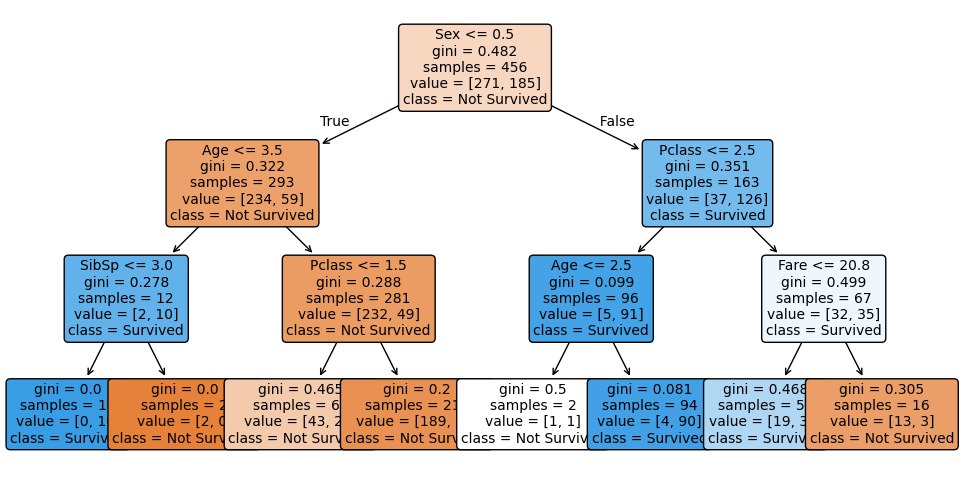

In [7]:
# Visualize the Decision Tree
visualize_tree(clf_titanic, feature_names_titanic, class_names=["Not Survived", "Survived"], save_path='titanic_tree.jpeg')

Tree visualization saved to diabetes_tree.jpeg


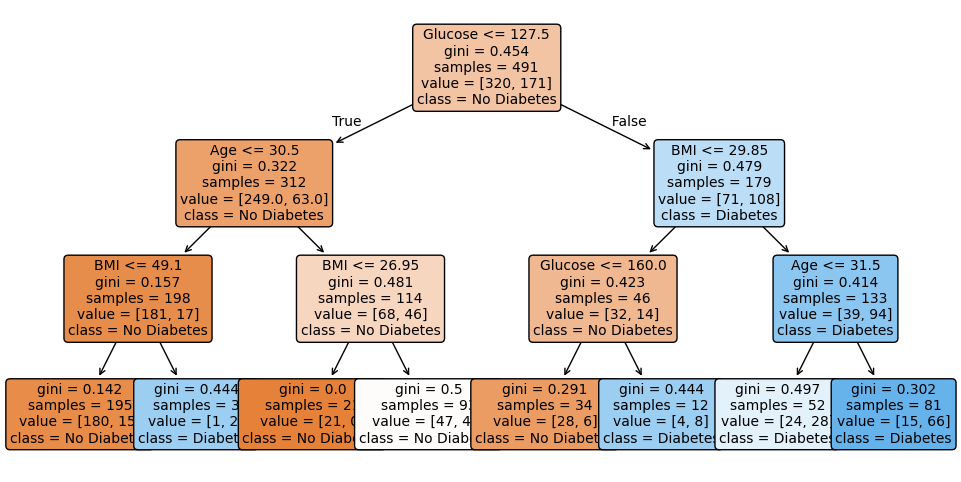

In [8]:
# Visualize the Diabetes Decision Tree
visualize_tree(clf_diabetes, feature_names_diabetes, class_names=["No Diabetes", "Diabetes"], save_path='diabetes_tree.jpeg')